### 1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
import scipy.stats as stats

In [42]:
df=pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\04_Simple_linear_regression\delivery_time.csv')

In [43]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [72]:
df2=df.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'})

In [65]:
df2.head()

,Delivery_Time,Sorting_TIme
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [46]:
df2.shape

(21, 2)

In [67]:
df2.describe()

,Delivery_Time,Sorting_TIme
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_TIme   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [68]:
df2.corr()

,Delivery_Time,Sorting_TIme
Delivery_Time,1.000000,0.825997
Sorting_TIme,0.825997,1.000000


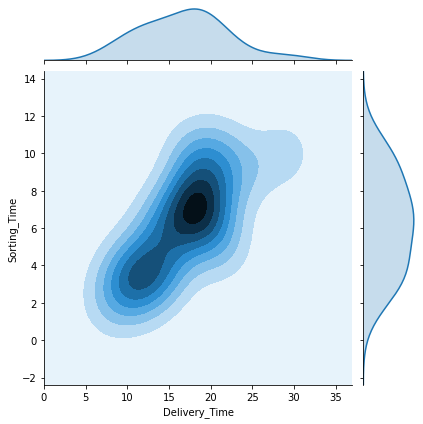

In [73]:
import seaborn as sns
sns.jointplot(data=df2,x='Delivery_Time',y='Sorting_Time',kind='kde')

In [51]:
import statsmodels.formula.api as smf

In [82]:
model=smf.ols("Delivery_Time~Sorting_Time",data=df2).fit()

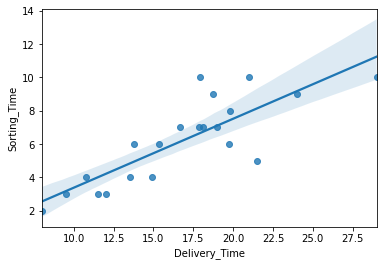

In [83]:
sns.regplot(x='Delivery_Time', y='Sorting_Time', data=df2)

In [84]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [85]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [86]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [87]:
newdata=pd.Series([6,8,12,32,8,21,16])

In [91]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [92]:
model.predict(data_pred)

0    16.476853
1    19.774893
2    26.370973
3    59.351371
4    19.774893
5    41.212152
6    32.967052
dtype: float64